# Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

DATA DICTIONARY:
-----------------------
System measures used:

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

usr - Portion of time (%) that cpus run in user mode

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('classic')
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import stats

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [3]:
df = pd.read_excel('compactiv.xlsx')
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [4]:
df.tail()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83
8191,2,0,985,55,46,1.6,4.80,111111.0,22256.0,0.00,...,0.00,0.2,3.40,6.20,91.80,110.00,CPU_Bound,659,1756514,94


In [5]:
df.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [6]:
print('Number of rows:',df.shape[0],'\nNumber of columns:',df.shape[1])

Number of rows: 8192 
Number of columns: 22


Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. This dataset has 8192 observations (rows) and 22 variables (columns) in the dataset.

In [7]:
print(df.info(),'\n')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

## We will use the whole data to perform basics of Exploratory Data Analysis and then use the data to build descriptive models.

## Let us check the basic measures of Descriptive Statistics of the numerical variables.

In [8]:
df.describe().T          #Checking the 5 point Summary of the Dataset.

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset.

In [9]:
df.skew()

lread       13.897852
lwrite       5.277645
scall        0.902531
sread        5.459466
swrite       9.605844
fork         2.249689
exec         4.069238
rchar        2.854044
wchar        3.847654
pgout        5.066984
ppgout       4.680442
pgfree       4.768191
pgscan       5.813415
atch        21.542020
pgin         3.242412
ppgin        3.902765
pflt         1.720284
vflt         1.737327
freemem      1.807555
freeswap    -0.791664
usr         -3.416750
dtype: float64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [12]:
df.isna().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

From the above results we can see that there is null values present in the rchar and wchar columns of the dataset.There are total 8192 rows & 22 columns in this dataset,indexed from 0 to 8191. Out of 22 variables 13 are float64 , 1 variable is object and 8 variables are int64. Memory used by the dataset: 1.4+ MB.

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 19,12

In [14]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

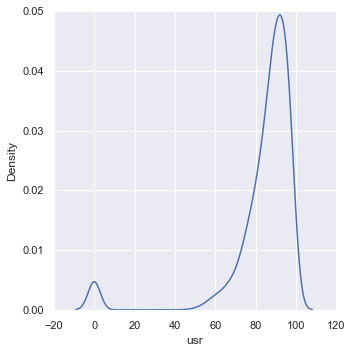

In [15]:
sns.displot(data=df,x="usr",kind="kde")  

In [16]:
df["runqsz"].value_counts() #Checking the Value counts of the Categorical Column.

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [17]:
df.skew()

lread       13.897852
lwrite       5.277645
scall        0.902531
sread        5.459466
swrite       9.605844
fork         2.249689
exec         4.069238
rchar        2.854044
wchar        3.847654
pgout        5.066984
ppgout       4.680442
pgfree       4.768191
pgscan       5.813415
atch        21.542020
pgin         3.242412
ppgin        3.902765
pflt         1.720284
vflt         1.737327
freemem      1.807555
freeswap    -0.791664
usr         -3.416750
dtype: float64

Text(0.5, 1.0, 'sread Distribution')

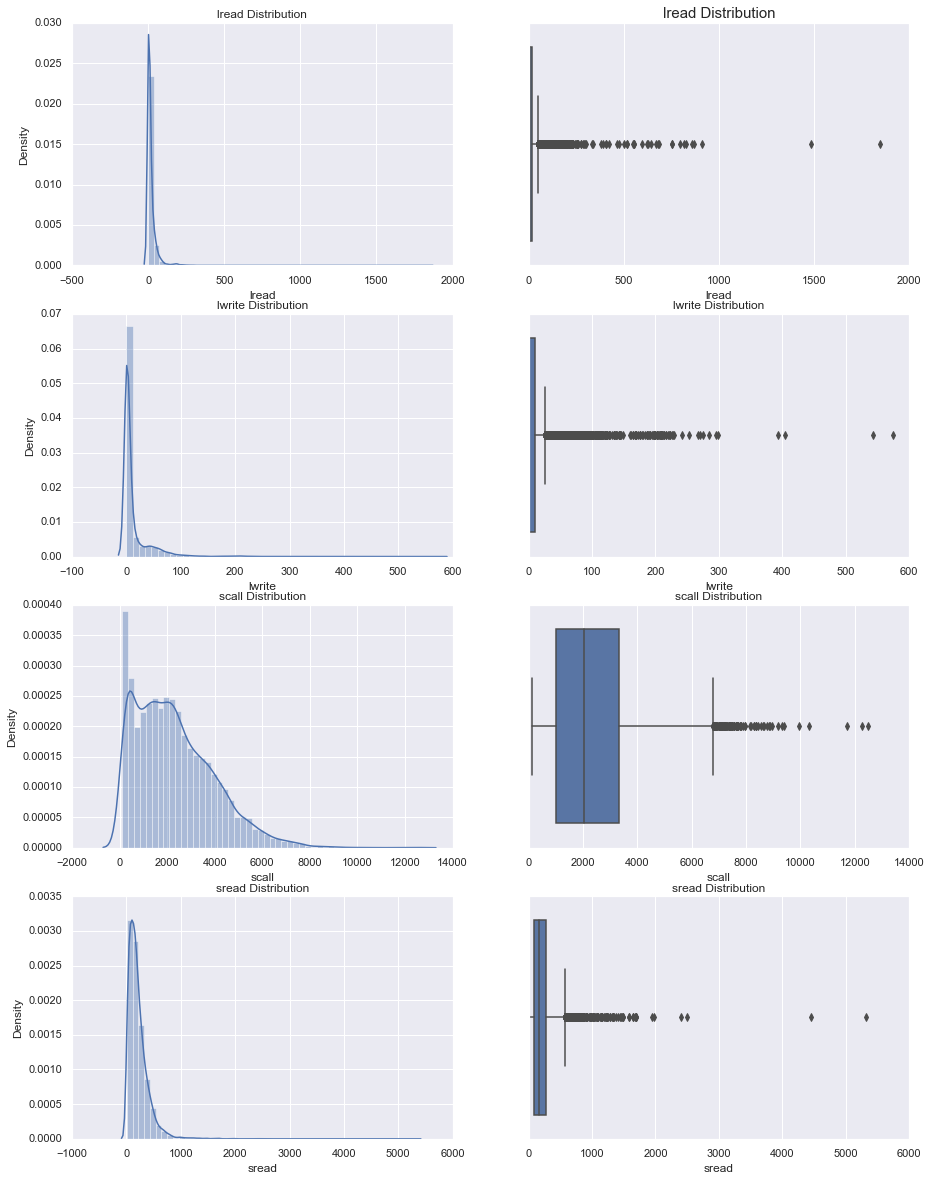

In [18]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['lread'] , ax=axes[0][0])
a.set_title("lread Distribution",fontsize=12)
a = sns.boxplot(df['lread'] , orient = "v" , ax=axes[0][1])
a.set_title("lread Distribution",fontsize=15)

a = sns.distplot(df['lwrite'] , ax=axes[1][0])
a.set_title("lwrite Distribution",fontsize=12)

a = sns.boxplot(df['lwrite'] , orient = "v" , ax=axes[1][1])
a.set_title("lwrite Distribution",fontsize=12)

a = sns.distplot(df['scall'] , ax=axes[2][0])
a.set_title("scall Distribution",fontsize=12)

a = sns.boxplot(df['scall'] , orient = "v" , ax=axes[2][1])
a.set_title("scall Distribution",fontsize=12)

a = sns.distplot(df['sread'] , ax=axes[3][0])
a.set_title("sread Distribution",fontsize=12)

a = sns.boxplot(df['sread'] , orient = "v" , ax=axes[3][1])
a.set_title("sread Distribution",fontsize=12)


Text(0.5, 1.0, 'rchar Distribution')

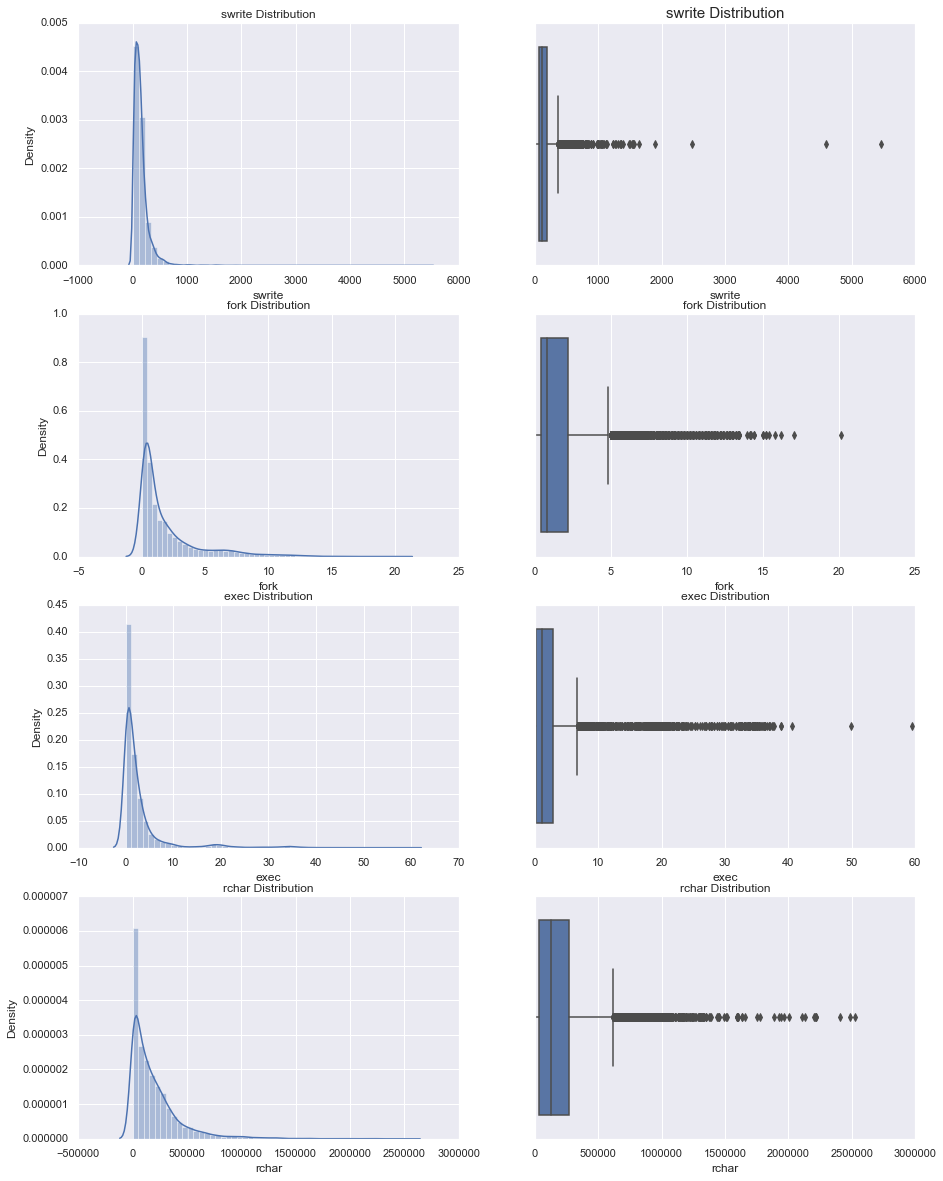

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['swrite'] , ax=axes[0][0])
a.set_title("swrite Distribution",fontsize=12)
a = sns.boxplot(df['swrite'] , orient = "v" , ax=axes[0][1])
a.set_title("swrite Distribution",fontsize=15)

a = sns.distplot(df['fork'] , ax=axes[1][0])
a.set_title("fork Distribution",fontsize=12)

a = sns.boxplot(df['fork'] , orient = "v" , ax=axes[1][1])
a.set_title("fork Distribution",fontsize=12)

a = sns.distplot(df['exec'] , ax=axes[2][0])
a.set_title("exec Distribution",fontsize=12)

a = sns.boxplot(df['exec'] , orient = "v" , ax=axes[2][1])
a.set_title("exec Distribution",fontsize=12)

a = sns.distplot(df['rchar'] , ax=axes[3][0])
a.set_title("rchar Distribution",fontsize=12)

a = sns.boxplot(df['rchar'] , orient = "v" , ax=axes[3][1])
a.set_title("rchar Distribution",fontsize=12)


Text(0.5, 1.0, 'pgfree Distribution')

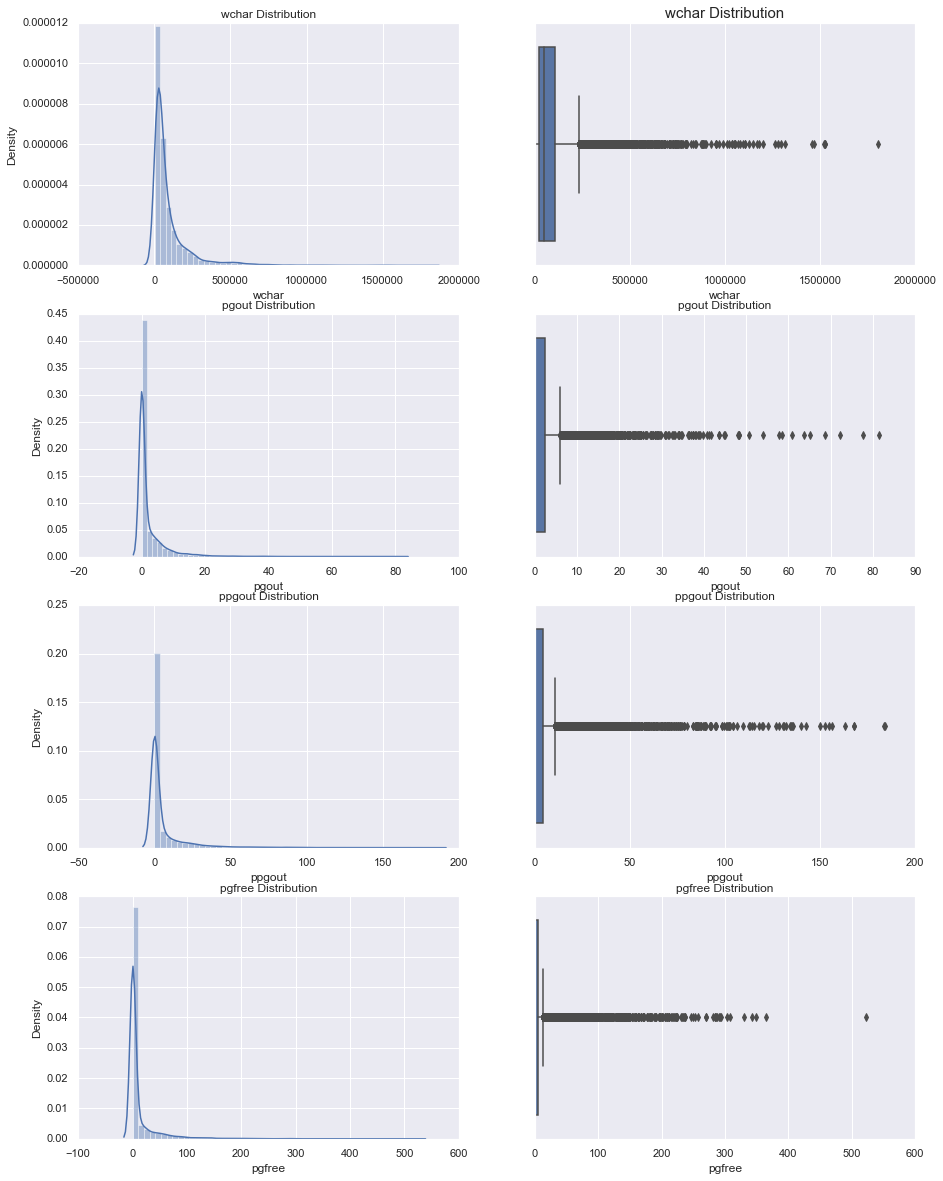

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['wchar'] , ax=axes[0][0])
a.set_title("wchar Distribution",fontsize=12)
a = sns.boxplot(df['wchar'] , orient = "v" , ax=axes[0][1])
a.set_title("wchar Distribution",fontsize=15)

a = sns.distplot(df['pgout'] , ax=axes[1][0])
a.set_title("pgout Distribution",fontsize=12)

a = sns.boxplot(df['pgout'] , orient = "v" , ax=axes[1][1])
a.set_title("pgout Distribution",fontsize=12)

a = sns.distplot(df['ppgout'] , ax=axes[2][0])
a.set_title("ppgout Distribution",fontsize=12)

a = sns.boxplot(df['ppgout'] , orient = "v" , ax=axes[2][1])
a.set_title("ppgout Distribution",fontsize=12)

a = sns.distplot(df['pgfree'] , ax=axes[3][0])
a.set_title("pgfree Distribution",fontsize=12)

a = sns.boxplot(df['pgfree'] , orient = "v" , ax=axes[3][1])
a.set_title("pgfree Distribution",fontsize=12)


Text(0.5, 1.0, 'ppgin Distribution')

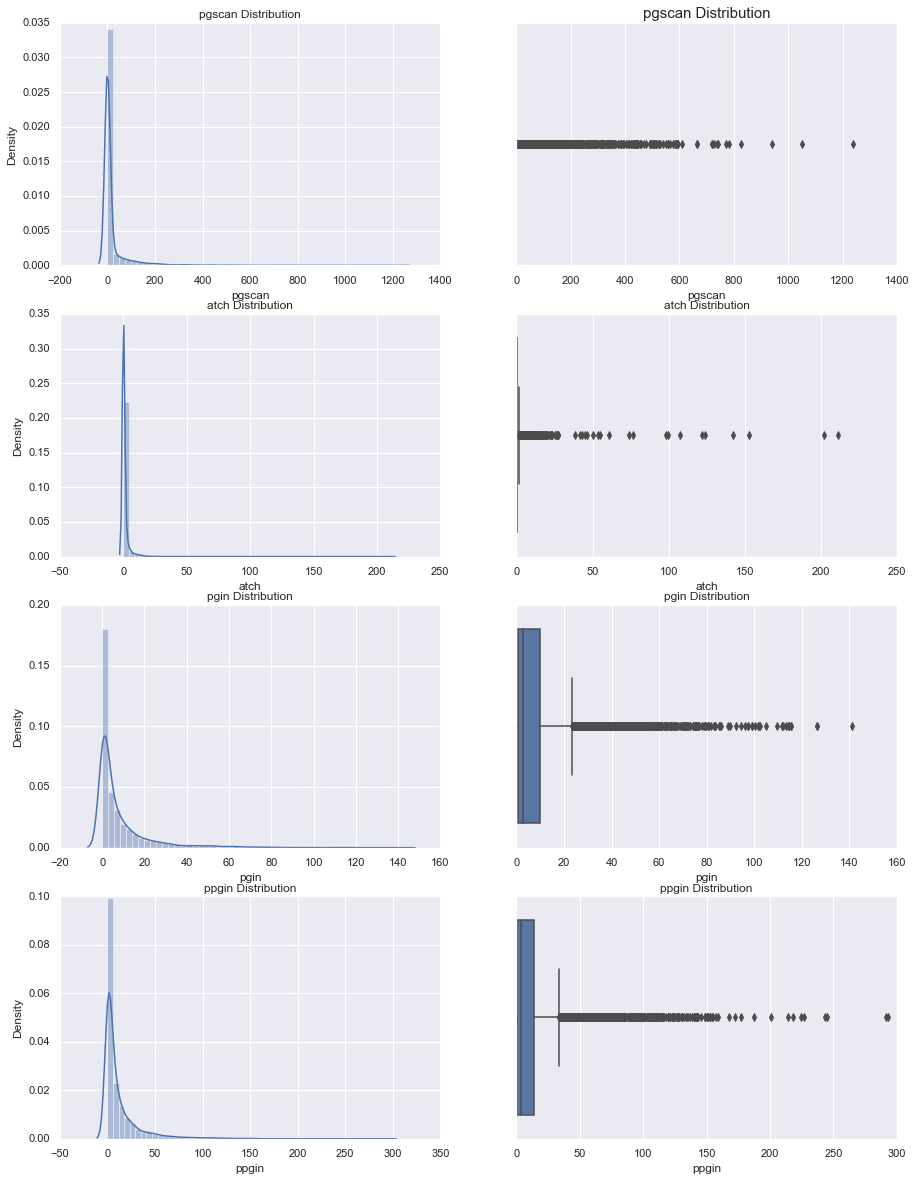

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['pgscan'] , ax=axes[0][0])
a.set_title("pgscan Distribution",fontsize=12)
a = sns.boxplot(df['pgscan'] , orient = "v" , ax=axes[0][1])
a.set_title("pgscan Distribution",fontsize=15)

a = sns.distplot(df['atch'] , ax=axes[1][0])
a.set_title("atch Distribution",fontsize=12)

a = sns.boxplot(df['atch'] , orient = "v" , ax=axes[1][1])
a.set_title("atch Distribution",fontsize=12)

a = sns.distplot(df['pgin'] , ax=axes[2][0])
a.set_title("pgin Distribution",fontsize=12)

a = sns.boxplot(df['pgin'] , orient = "v" , ax=axes[2][1])
a.set_title("pgin Distribution",fontsize=12)

a = sns.distplot(df['ppgin'] , ax=axes[3][0])
a.set_title("ppgin Distribution",fontsize=12)

a = sns.boxplot(df['ppgin'] , orient = "v" , ax=axes[3][1])
a.set_title("ppgin Distribution",fontsize=12)


Text(0.5, 1.0, 'usr Distribution')

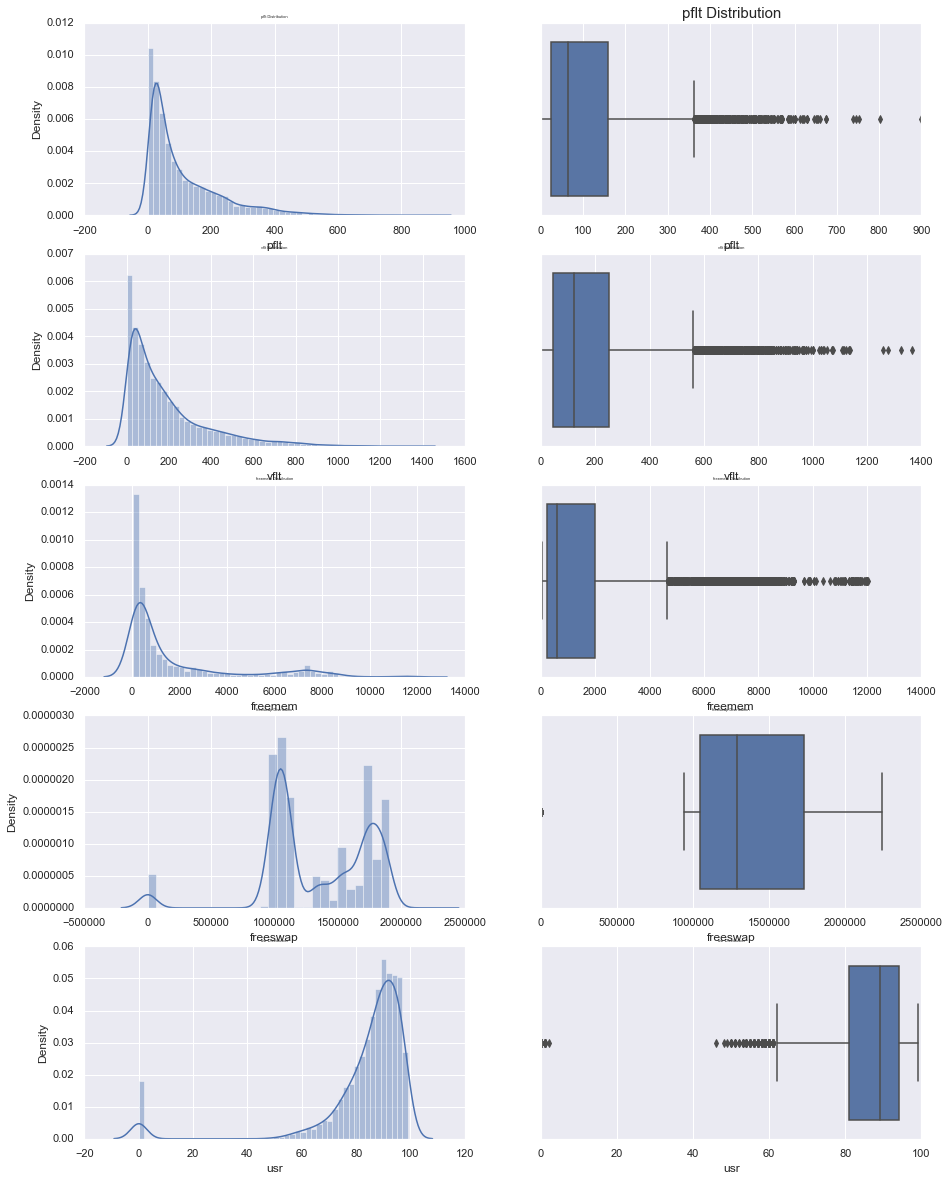

In [22]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['pflt'] , ax=axes[0][0])
a.set_title("pflt Distribution",fontsize=4)
a = sns.boxplot(df['pflt'] , orient = "v" , ax=axes[0][1])
a.set_title("pflt Distribution",fontsize=15)

a = sns.distplot(df['vflt'] , ax=axes[1][0])
a.set_title("vflt Distribution",fontsize=4)

a = sns.boxplot(df['vflt'] , orient = "v" , ax=axes[1][1])
a.set_title("vflt Distribution",fontsize=4)

a = sns.distplot(df['freemem'] , ax=axes[2][0])
a.set_title("freemem Distribution",fontsize=4)

a = sns.boxplot(df['freemem'] , orient = "v" , ax=axes[2][1])
a.set_title("freemem Distribution",fontsize=4)

a = sns.distplot(df['freeswap'] , ax=axes[3][0])
a.set_title("freeswap Distribution",fontsize=4)

a = sns.boxplot(df['freeswap'] , orient = "v" , ax=axes[3][1])
a.set_title("freeswap Distribution",fontsize=4)

a = sns.distplot(df['usr'] , ax=axes[4][0])
a.set_title("usr Distribution",fontsize=4)

a = sns.boxplot(df['usr'] , orient = "v" , ax=axes[4][1])
a.set_title("usr Distribution",fontsize=4)

            
        



   One of the assumptions of linear regression is that there should not be any kind of outliers

In [23]:
cor = df.corr()
cor

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
lread,1.000000,0.533737,0.191377,0.132881,0.119953,0.140284,0.110965,0.107973,0.081571,0.082463,...,0.114438,0.087783,0.021563,0.189799,0.161345,0.137463,0.165539,-0.083214,-0.081293,-0.141394
lwrite,0.533737,1.000000,0.143404,0.128403,0.101524,0.052511,0.038237,0.115121,0.091718,0.067013,...,0.065692,0.042608,0.028310,0.091068,0.089011,0.067024,0.094965,-0.091133,-0.116478,-0.111213
scall,0.191377,0.143404,1.000000,0.696887,0.619984,0.446766,0.308999,0.351413,0.274092,0.194529,...,0.199778,0.177908,0.077969,0.241628,0.219070,0.481781,0.531760,-0.387520,-0.350629,-0.323188
sread,0.132881,0.128403,0.696887,1.000000,0.881069,0.416721,0.164084,0.502397,0.401784,0.193679,...,0.212911,0.194272,0.085468,0.207012,0.210225,0.452020,0.491045,-0.286437,-0.302036,-0.332160
swrite,0.119953,0.101524,0.619984,0.881069,1.000000,0.376876,0.103643,0.331386,0.394230,0.151371,...,0.145458,0.120180,0.061373,0.147000,0.144278,0.396580,0.416571,-0.248574,-0.237062,-0.272252
fork,0.140284,0.052511,0.446766,0.416721,0.376876,1.000000,0.763974,0.281229,0.060790,0.130192,...,0.168082,0.160839,0.047194,0.163468,0.132181,0.931040,0.939348,-0.123357,-0.130442,-0.363277
exec,0.110965,0.038237,0.308999,0.164084,0.103643,0.763974,1.000000,0.169189,0.000547,0.111465,...,0.146163,0.144855,0.052307,0.186099,0.149911,0.645239,0.691754,-0.158565,-0.153347,-0.288526
rchar,0.107973,0.115121,0.351413,0.502397,0.331386,0.281229,0.169189,1.000000,0.503531,0.211268,...,0.277786,0.259446,0.171532,0.299784,0.347224,0.313246,0.363799,-0.149485,-0.220608,-0.329737
wchar,0.081571,0.091718,0.274092,0.401784,0.394230,0.060790,0.000547,0.503531,1.000000,0.192436,...,0.159229,0.113638,0.181408,0.178290,0.200880,0.086128,0.111082,-0.149060,-0.226044,-0.288974
pgout,0.082463,0.067013,0.194529,0.193679,0.151371,0.130192,0.111465,0.211268,0.192436,1.000000,...,0.730381,0.553916,0.147759,0.385648,0.414865,0.151285,0.229129,-0.269687,-0.245378,-0.221877


Other assumption of linear regression is that there should be linear relationship between the independent and the dependent 
variables.My dependent variable should be highly correlated with independent variables.To validate this ,we can check scatterplot or correlation plot.

<function matplotlib.pyplot.show(close=None, block=None)>

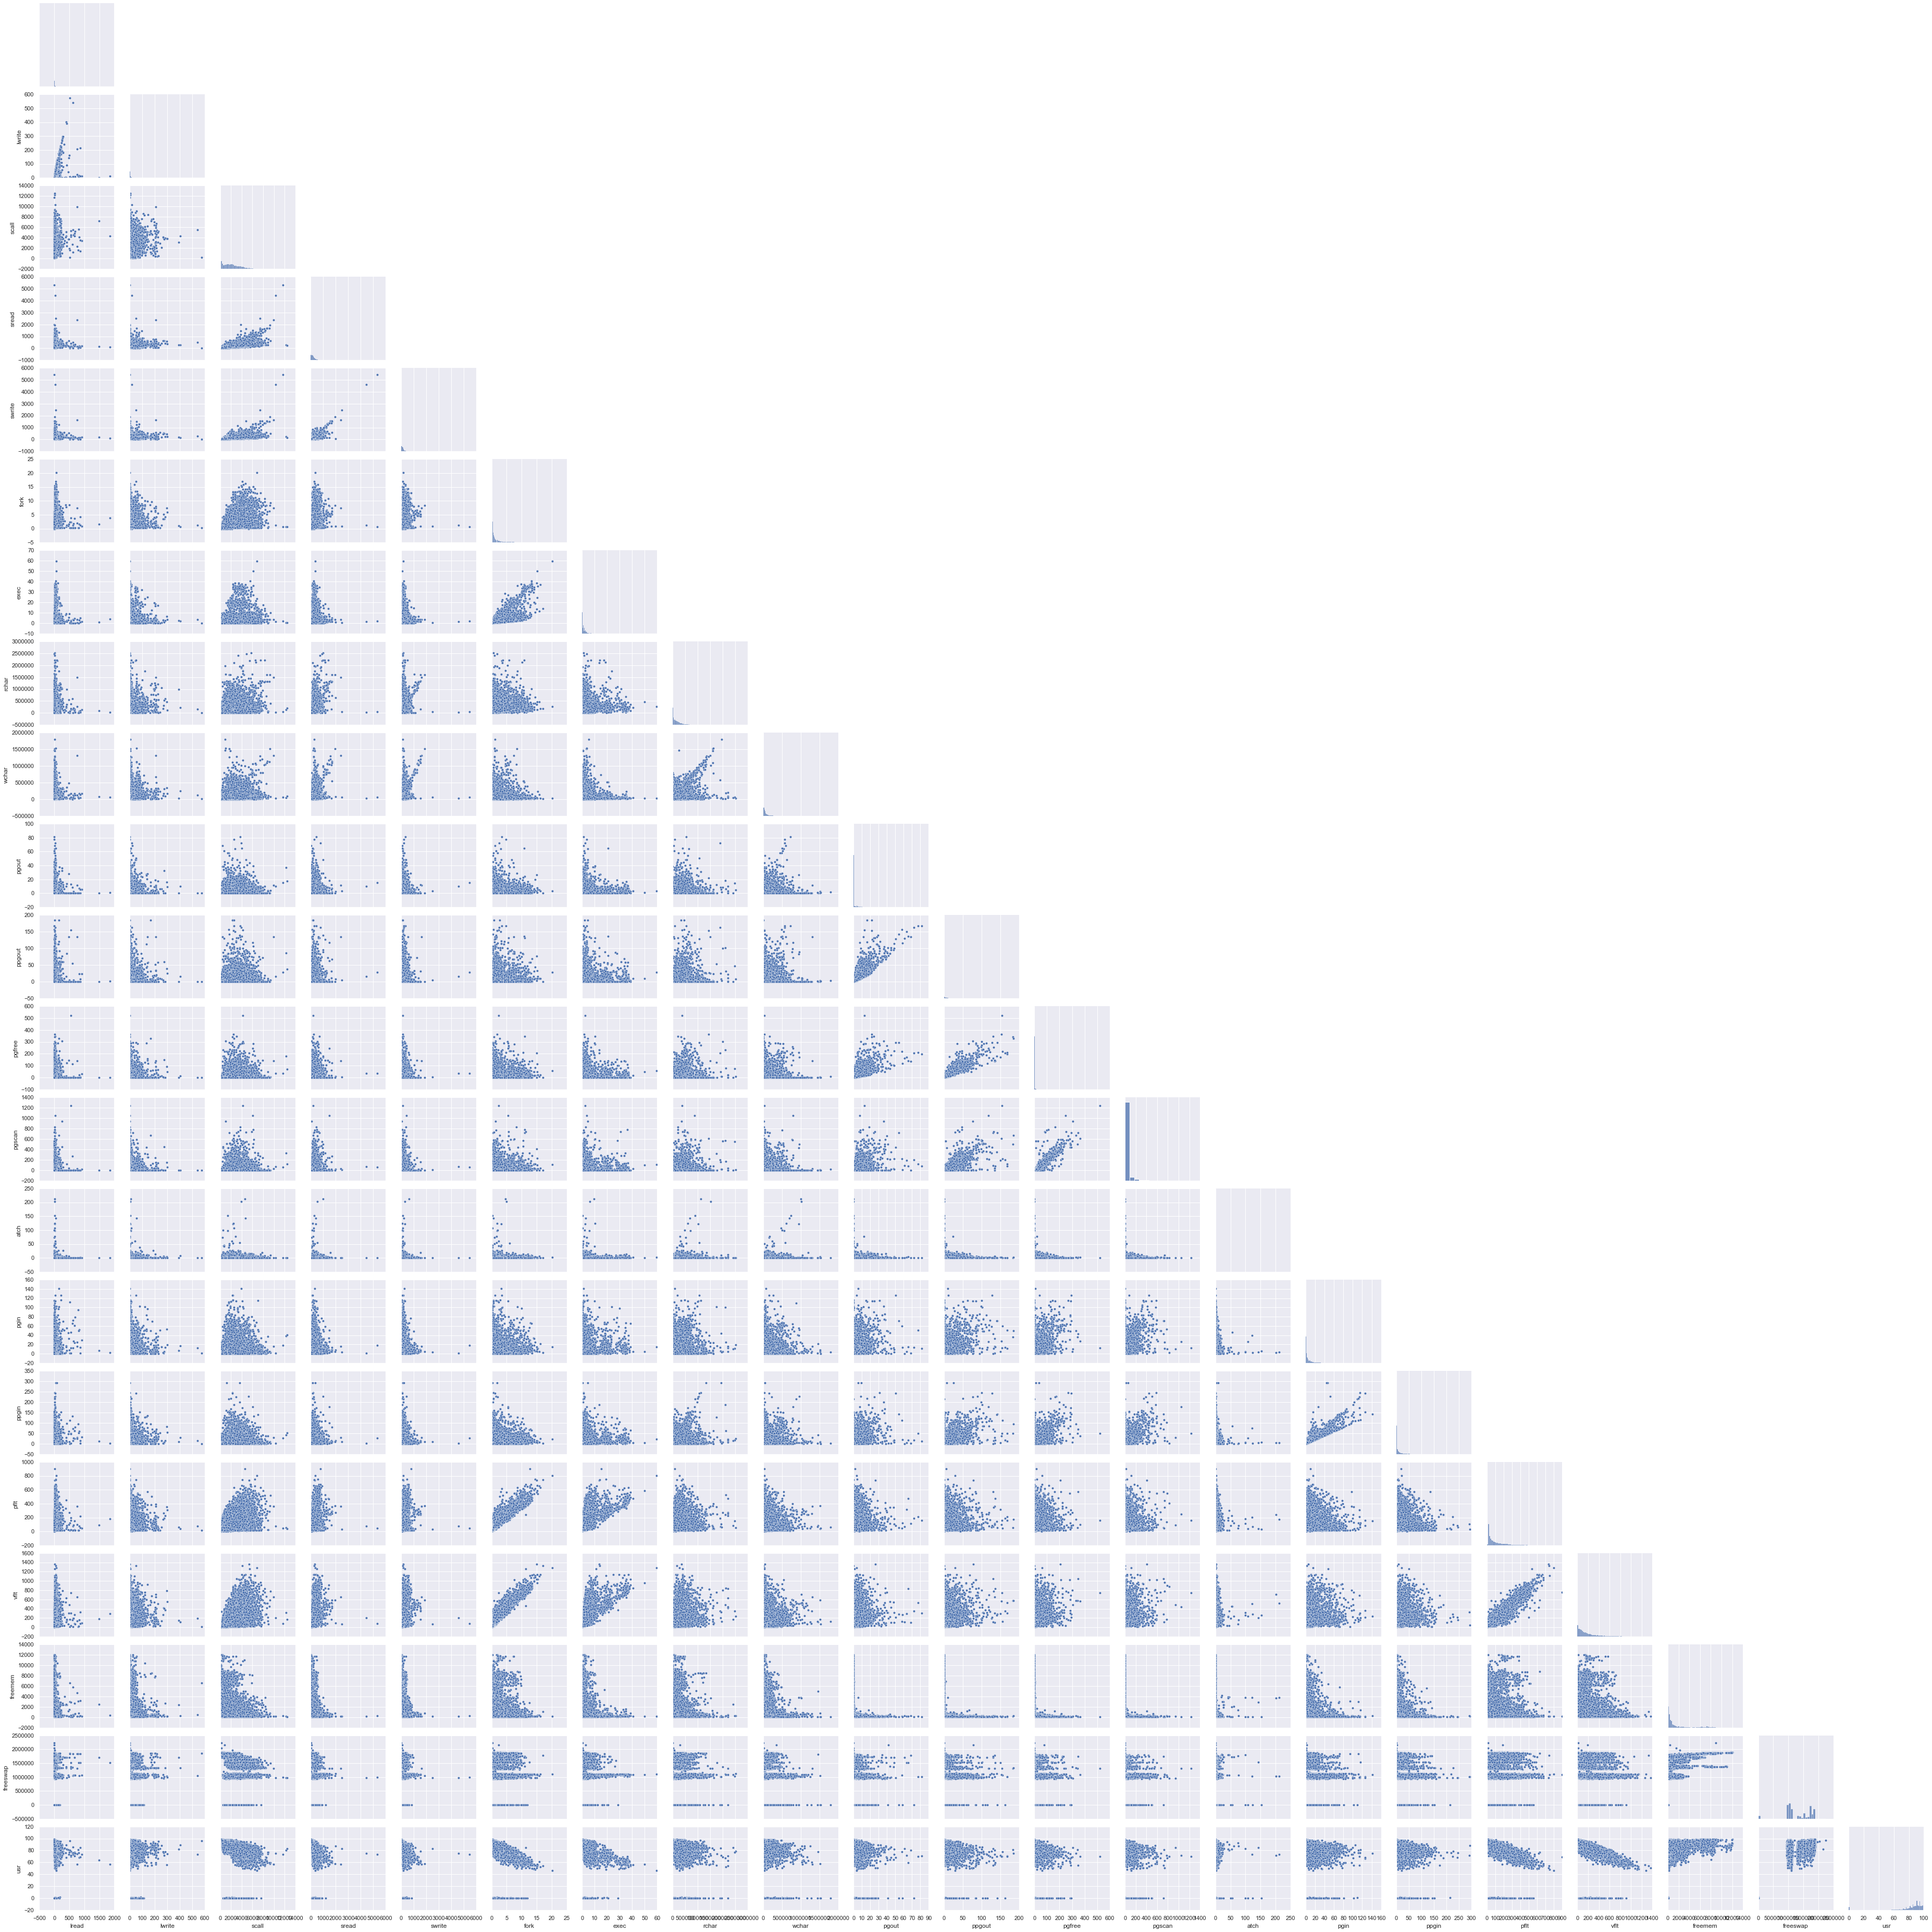

In [24]:
sns.pairplot(df,corner=True)
plt.show

<Figure size 3600x1800 with 0 Axes>

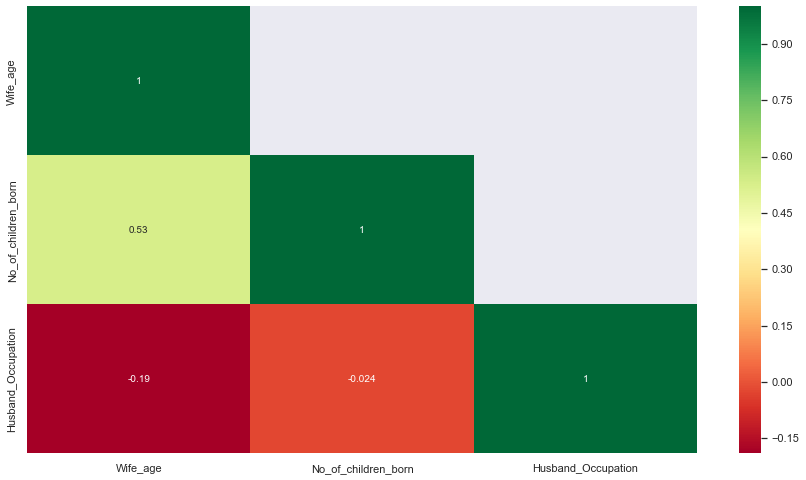

<Figure size 3600x1800 with 0 Axes>

In [144]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True,mask=np.triu(cor,+1),cmap='RdYlGn');plt.figure(figsize=(50,25))


# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [145]:
df.isna().sum()         #CHECKING NULL VALUES

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [146]:
##IMPUTING NULL VALUES

In [147]:
df['rchar'] = df['rchar'].fillna(df['rchar'].median()) #Filling NA values of "rchar" and "wchar" with the median 

In [148]:
df['wchar'] = df['wchar'].fillna(df['wchar'].median())

In [149]:
df.isna().sum()   #There are no null values now.

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [150]:
for column_name in df.columns:
    column = df[column_name]         #checking for values which are equal to zero in every column
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  lread  is :  675
Count of zeros in column  lwrite  is :  2684
Count of zeros in column  scall  is :  0
Count of zeros in column  sread  is :  0
Count of zeros in column  swrite  is :  0
Count of zeros in column  fork  is :  21
Count of zeros in column  exec  is :  21
Count of zeros in column  rchar  is :  0
Count of zeros in column  wchar  is :  0
Count of zeros in column  pgout  is :  4878
Count of zeros in column  ppgout  is :  4878
Count of zeros in column  pgfree  is :  4869
Count of zeros in column  pgscan  is :  6448
Count of zeros in column  atch  is :  4575
Count of zeros in column  pgin  is :  1220
Count of zeros in column  ppgin  is :  1220
Count of zeros in column  pflt  is :  3
Count of zeros in column  vflt  is :  0
Count of zeros in column  runqsz  is :  0
Count of zeros in column  freemem  is :  0
Count of zeros in column  freeswap  is :  0
Count of zeros in column  usr  is :  283


We're not dropping zeroes as of now,if you drop zeroes,we may drop most of the records.We'll build the model first and check out later

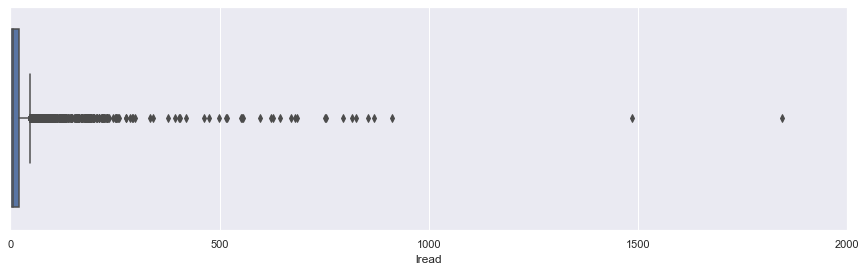

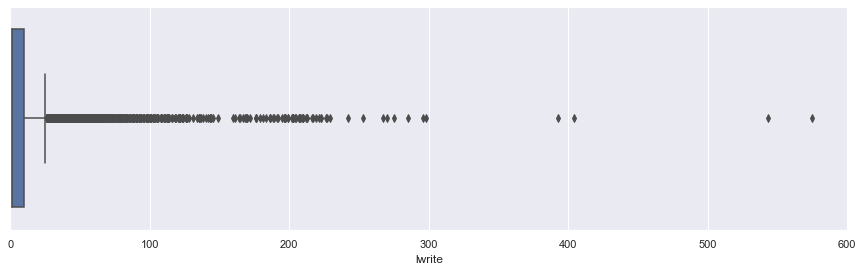

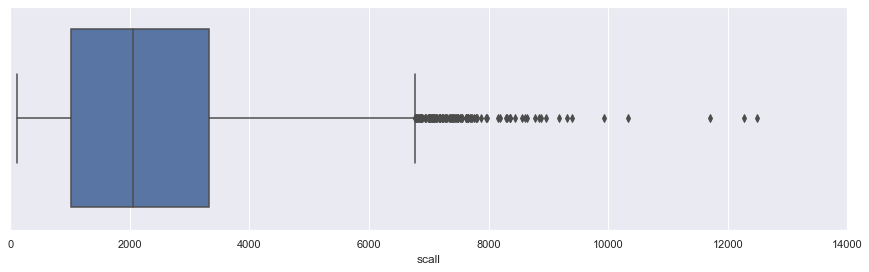

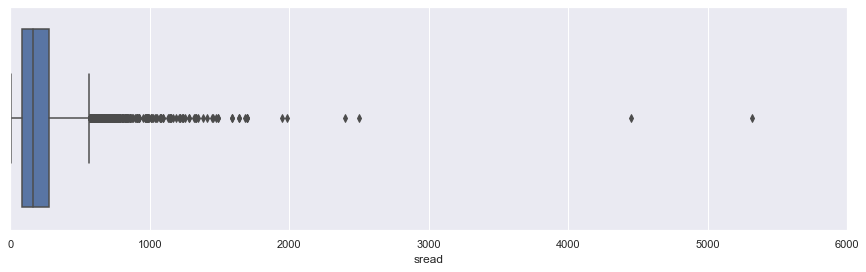

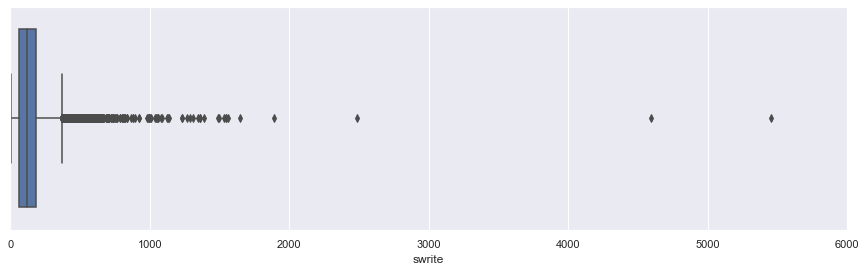

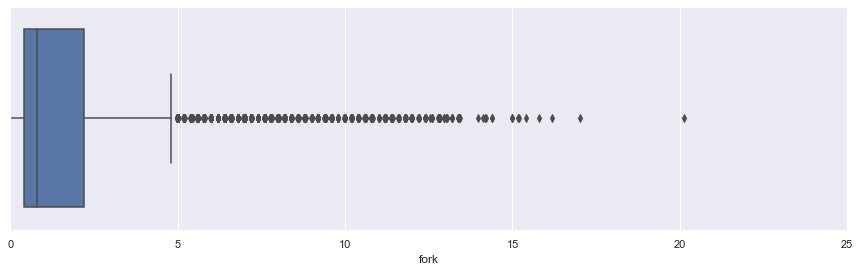

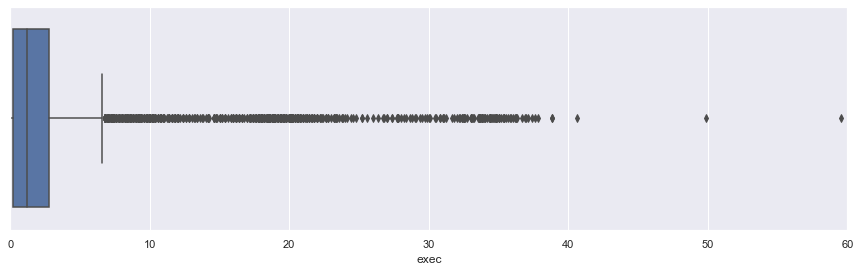

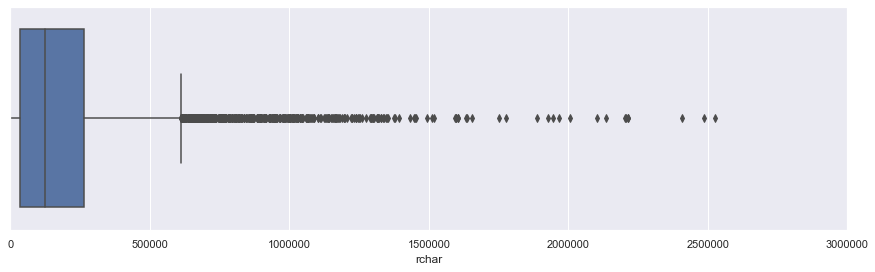

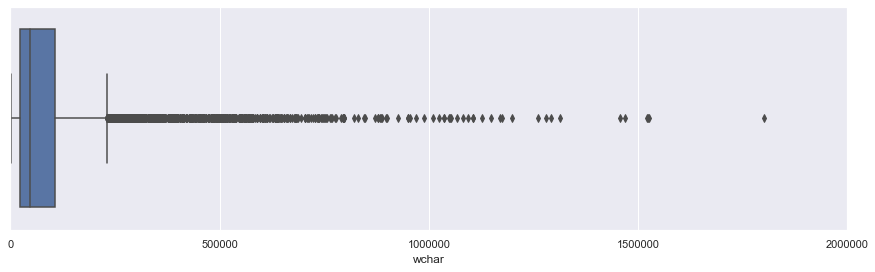

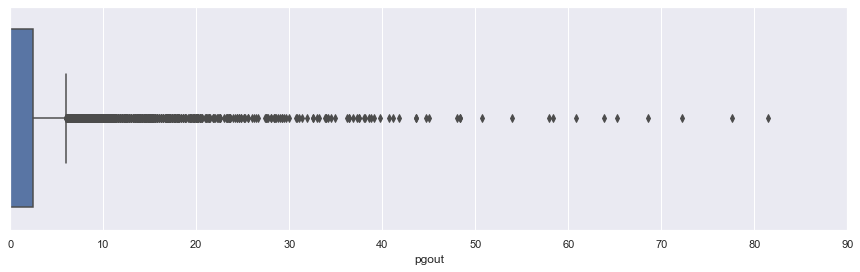

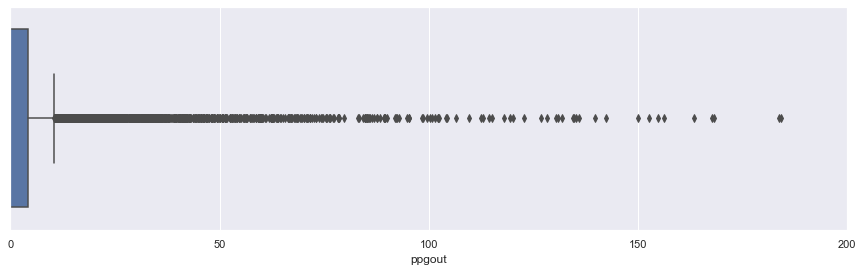

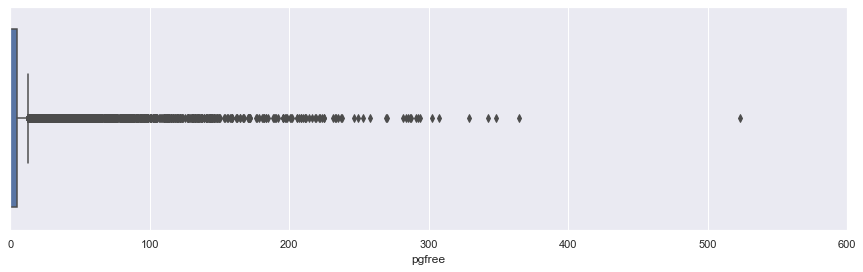

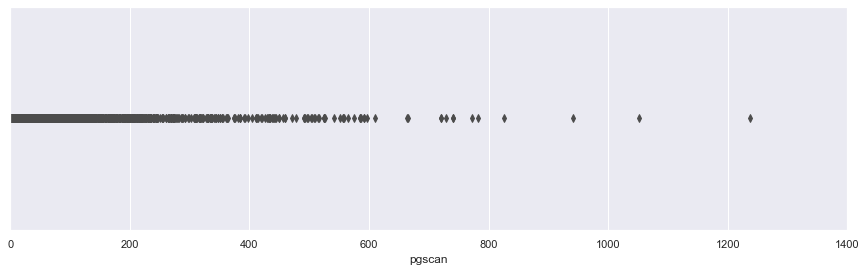

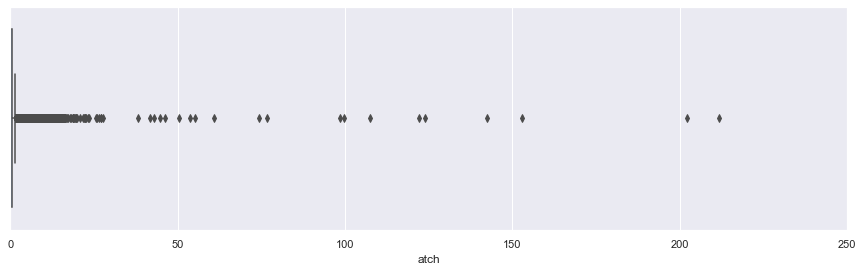

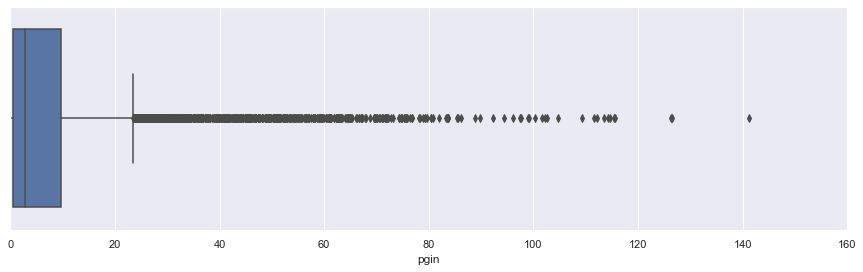

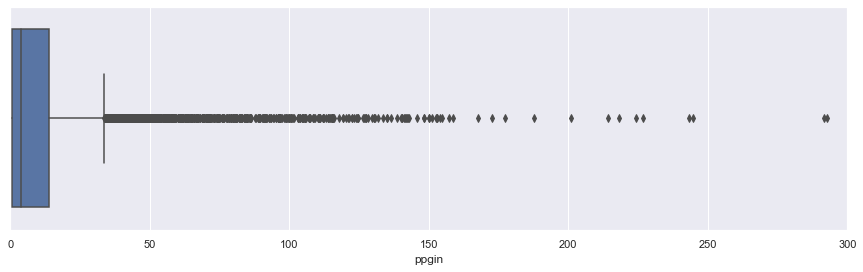

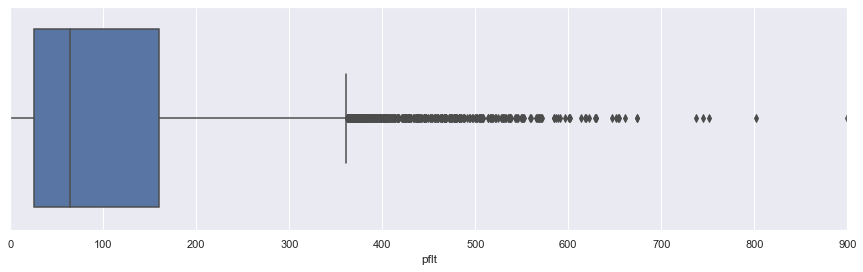

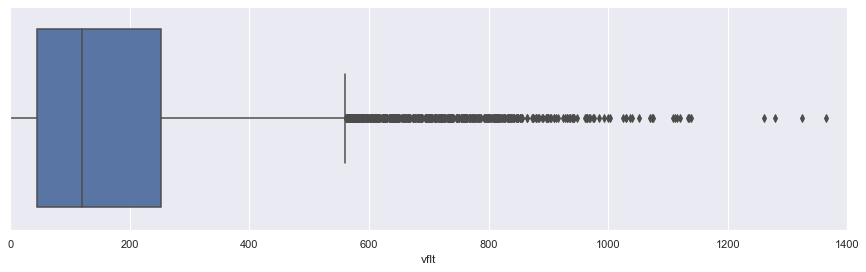

TypeError: Horizontal orientation requires numeric `x` variable.

In [151]:
for i in df: #CHECKING OUTLIERS
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df.head()

In [ ]:
df.duplicated().sum() #there are no duplicated records

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [ ]:
df["runqsz"].value_counts() 

In [ ]:
df_dummy = pd.get_dummies(df,drop_first=True)     ##ENCODING THE STRING VALUES USING ONE HOT ENCODING      

In [ ]:
df_dummy.head()

In [ ]:
df_dummy.columns

In [ ]:
#check for Multicolinearity 
import statsmodels.formula.api as SM
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=df_dummy[['lread', 'lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap',  'runqsz_Not_CPU_Bound']])

In [ ]:
#Multicollinearity exists as VIF>5

# Building a base model with all the features 

Whenever you're building linear regression model,first build using "Statsmodels".The reason behind is that it has a very good ols 
result which is going to be in summary format.In SKLEARN,we will not get summary.

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
df_dummy.columns

In [ ]:
model='usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model = SM.ols(formula=model,data=df_dummy).fit()
model.summary()

#ANOVA(prob F-stat):
.
null hypothesis: 
none of the independent variables have a relation with the dependent variable(all betas are zero)

alternate hypothesis: at least one of the independent variables is having relation with dependent variable.
      (any one of the betas is non zero)
        
Here,pvalue i.e prob F-stat<0.05.we'll reject null hypothesis.It means at least one of the independent variables is having relation with dependent variable

#ttest : to check which variable is having higher relation with your target variable

null: beta=0

alternate: beta<>0
    
    
    From P>|t| column ,we can say lwrite,sread,exec,swrite,atch,are not significant to the model as their p values are greater than 0.05."Intercept" is also not significant.these are statistically insignificant variables. even if we remove them,the model performance will not be affected

Now, let us check and treat the multicollinearity problem if it is present.

Now, we will calculate the Variance Inflation Factor (VIF). We will calculate the Variance Inflation Factor by an user defined function.

VIF regresses the dependent variables amongst themselves and then calculates the VIF values based on the ${R^2}$ of each such regression.

# The formula for VIF calculation is :
# vif = $\frac{1}{1 - {R^2}}$

Below is the function that is created to calculate the Variance Inflation Factor (VIF) values.
- 1st line code is about defining a function "vif_cal" which we shall use to call the function.
- We then define the x or the predictor variables. 
- The second step is to get the data in each of the column variable
- Then we define a 'for' loop where the y or the target variable is defined as one of the variables of the input data set.
- The x or the predictor variables are then defined as all the variables of the input data except the y or the target variable defined in the last step.
- We then fit a regression function and calculate the ${R^2}$ value which is being stored in the variable rsq.
- Another variable by the name of vif is defined and the ${R^2}$ value is put into the formula of the vif calculation.
- Lastly, we print this value.

This process is being repeated for all the predictor variables.

In [ ]:
#checking model performance by removing "vflt "
model_1='usr~lread+lwrite+scall+sread+swrite+pflt+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_1 = SM.ols(formula=model_1,data=df_dummy).fit()
model_1.summary()

In [ ]:
#checking model performance by removing "fork"
model_2='usr~lread+lwrite+scall+sread+pflt+swrite+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_2 = SM.ols(formula=model_2,data=df_dummy).fit()
model_2.summary()

In [ ]:
#checking model performance by removing "pgfree"
model_3='usr~lread+lwrite+scall+sread+pflt+swrite+exec+rchar+wchar+pgout+ppgout+pgscan+atch+pgin+ppgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_3 = SM.ols(formula=model_3,data=df_dummy).fit()
model_3.summary()

In [ ]:
#checking model performance by removing "ppgout"
model_4='usr~lread+lwrite+scall+sread+pflt+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+ppgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_4 = SM.ols(formula=model_4,data=df_dummy).fit()
model_4.summary()

In [ ]:
#checking model performance by removing "sread"
model_5='usr~lread+lwrite+scall+swrite+exec+pflt+rchar+wchar+pgout+pgscan+atch+pgin+ppgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_5 = SM.ols(formula=model_5,data=df_dummy).fit()
model_5.summary()

In [ ]:
vif_cal(input_data=df_dummy[['lread', 'lwrite','scall','pflt','swrite','exec','rchar','wchar','pgout', 'pgscan', 'atch', 'pgin', 'ppgin',
    'freemem', 'freeswap','runqsz_Not_CPU_Bound']])

In [ ]:
#checking model performance by removing "ppgin"
model_6='usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pflt+pgout+pgscan+atch+pgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_6 = SM.ols(formula=model_6,data=df_dummy).fit()
model_6.summary()

In [ ]:
vif_cal(input_data=df_dummy[['lread', 'lwrite','scall','swrite','exec','pflt','rchar','wchar','pgout', 'pgscan', 'atch', 'pgin',
    'freemem', 'freeswap','runqsz_Not_CPU_Bound']])

In [ ]:
#checking model performance by removing "pgscan"
model_7='usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pflt+pgout+atch+pgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_7 = SM.ols(formula=model_7,data=df_dummy).fit()
model_7.summary()

In [ ]:
vif_cal(input_data=df_dummy[['lread', 'lwrite','scall','swrite','exec','pflt','rchar','wchar','pgout', 'atch', 'pgin',
    'freemem', 'freeswap','runqsz_Not_CPU_Bound']])

In [ ]:
#checking model performance by removing "atch"
model_8='usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pflt+pgout+pgin+freemem+freeswap+runqsz_Not_CPU_Bound'

In [ ]:
model_8 = SM.ols(formula=model_8,data=df_dummy).fit()
model_8.summary()

In [ ]:
vif_cal(input_data=df_dummy[['lread', 'lwrite','scall','swrite','exec','pflt','rchar','wchar','pgout','pgin',
    'freemem', 'freeswap','runqsz_Not_CPU_Bound']])

In [ ]:
columns=['lread', 'lwrite','scall','swrite','exec','pflt','rchar','wchar','pgout','pgin',
    'freemem', 'freeswap','runqsz_Not_CPU_Bound']

# PREDICTION AND SCATTERPLOT

In [ ]:
X=df_dummy[columns]
Y=df_dummy["usr"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=111)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,Y_train)

In [ ]:
lr_model.score(X_train,Y_train)     #r square

Predicting for future values will be very easy if we get beta0,beta1,beta2...................

In [ ]:
lr_model.coef_     #regression coefficients i.e beta1,beta2.........

In [ ]:
lr_model.intercept_ #beta0

In [ ]:
columns

 #usr(pred)=43.50501683826659-(2.13715521e-02 * lread) (1.23369450e-02 * lwrite)+(1.27805141e-03 * scall)-(3.13558432e-03 * swrite)-
(1.92866216e-01 * exec)-(4.01928314e-02 * pflt)-(3.50679241e-06 * rchar)-(1.08591693e-05 * wchar)-(1.47629416e-01 * pgout)
+(2.54303584e-02 * pgin)-(1.70116294e-03 * freemem)-(3.29581546e-05 * freeswap)+(7.99406585e+00 * runqsz_Not_CPU_Bound')

In [ ]:
Y_train #actual values for train dataset

In [ ]:
lr_model.predict(X_train)    #predicted values for the train dataset

In [ ]:
Y_test #actual values for the test dataset

In [ ]:
lr_model.predict(X_test) #predicted values for the test dataset

In [ ]:
#Using the last best model 
model_8_pred = model_8.fittedvalues
model_8_pred

In [ ]:
sns.distplot(model_8.fittedvalues)
sns.distplot(df_dummy["usr"])

In [ ]:
#Linear Relationship b/w Dependent and Independent Varaibles 

sns.scatterplot(model_8.resid,model_8.fittedvalues)

There is so much of difference in my actual and predicted value.This is coz my R square value is only 0.63 with the variables i've 
choosen.My variables can explain 63 % of the variation in the dependent variable.

In [ ]:
lr_model.score(X_train,Y_train) #r square for training data

In [ ]:
lr_model.score(X_test,Y_test) #r square for test data

In [ ]:
#there is no overfitting/underfitting scenario because my train and test performance is approx the same which is 0.63

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
y_train_pred=lr_model.predict(X_train)
y_test_pred=lr_model.predict(X_test)
mean_squared_error(Y_train,y_train_pred,squared=False) #RMSE for training data

In [ ]:
mean_squared_error(Y_test,y_test_pred,squared=False) #RMSE for test data

In [ ]:
#Here,RMSE of train and test data are very much similar which means there's no overfittinng/underfitting.



The mean squared error (MSE) is the mean of a model's residuals. When you fit a regression model predicting some continuous response variable, and then use that model to predict the values of some data, the residuals are the differences between the values that your model predicts, and the actual values in the data.

In machine Learning when we want to look at the accuracy of our model we take the root mean square of the error(RMSE) that has occurred between the test values and the predicted values mathematically. As the name suggests, it is calculated by taking the square root over the mean of the squared errors of individual points.

In [ ]:
mean_absolute_error(Y_train,y_train_pred)

In [ ]:
mean_absolute_error(Y_test,y_test_pred)

In [ ]:
mean_absolute_percentage_error(Y_train,y_train_pred)*100

In [ ]:
mean_absolute_percentage_error(Y_test,y_test_pred)*100

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [ ]:
## CONCLUSIONS FROM 8th Iteration that is the BEST MODEL

usr(pred)=43.50501683826659-(2.13715521e-02 * lread)+(1.23369450e-02 * lwrite)+(1.27805141e-03 * scall)-(3.13558432e-03 * swrite)-
(1.92866216e-01 * exec)-(4.01928314e-02 * pflt)-(3.50679241e-06 * rchar)-(1.08591693e-05 * wchar)-(1.47629416e-01 * pgout)
+(2.54303584e-02 * pgin)-(1.70116294e-03 * freemem)-(3.29581546e-05 * freeswap)+(7.99406585e+00 * runqsz_Not_CPU_Bound')

if lread increases by 1 unit,predicted usr will gown by 0.021 unit.
if lwrite increases by 1 unit,predicted usr will go up by 0.0123 unit.
if scall increases by 1 unit,predicted usr will go up by 0.0001 unit
if swrite increases by 1 unit,predicted usr decrease by 0.003 unit
if exec increases by 1 unit,predicted usr decrease by 0.019 unit
if pflt increases by 1 unit,predicted usr decrease by 0.04 unit
if rchar increases by 1 unit,predicted usr decrease by 3.29581546e-05 unit
if wchar increases by 1 unit,predicted usr decrease by 0.019 unit
if pgout increases by 1 unit,predicted usr decrease by 1.47629416e-01 unit
if pgin increases by 1 unit,predicted usr increase by 2.54303584e-02  unit
if freemem increases by 1 unit,predicted usr decrease by 1.70116294e-03  unit
if freewap increases by 1 unit,predicted usr decrease by 3.29581546e-05 unit
if runqsz_Not_CPU_Bound' increases by 1 unit,predicted usr increase by 7.9940658 unit


Comparing the model scores from the linear regression models,model 8 seems to be the best model. R square for my train and test data is approx 63 percent which means 63 percent of the variance in the target variable is explained by the predictors(independent variables).Also for better accuracy ,we dropped the columns "fork","pgfree","ppgout","sread",
"ppgin","pgscan","atch" as some of them have vif much greater than 5 and some have pvalues>0.5.
From the linear equation model,we can see runqsz_Not_CPU_Bound is the highest coefficient in predicting usr.The top attributes in influencing the usr are "runqsz_Not_CPU_Bound',exec,pgin ,lwrite etc.

# Problem 2: Logistic Regression
You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
df1 = pd.read_excel('Contraceptive_method_dataset.xlsx')
df1.head()

In [ ]:
df1.tail()

In [ ]:
print('The number of rows (observations) is',df1.shape[0],'\n''The number of columns (variables) is',df1.shape[1])

In [ ]:
df1.describe(include="all").T

In [ ]:
df1.isnull().sum()

In [ ]:
df1['Wife_age'] = df1['Wife_age'].fillna(df1['Wife_age'].median()) 

In [ ]:
df1['No_of_children_born'] = df1['No_of_children_born'].fillna(df1['No_of_children_born'].median()) 

In [ ]:
df1.isnull().sum()

In [ ]:
df1.duplicated().sum()   #85 duplicated records

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.duplicated().sum()

In [ ]:
df1.info()

In [ ]:
df1.iloc[:,0:11].hist();
plt.figure(figsize=(50,25))

In [ ]:
df1.plot(kind='box')

In [ ]:
cor = df1.corr()
cor

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,mask=np.triu(cor,+1),cmap='viridis');plt.figure(figsize=(20,10))

In [ ]:
sns.pairplot(df1)

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors.

In [ ]:
df1.head(5)

In [ ]:
df1.dtypes

In [ ]:
# remove spaces from column names
df1.columns = df1.columns.str.replace(" ", "")

# display the dataframe
df1

In [ ]:
df1['Contraceptive_method_used'].value_counts()

In [ ]:
df1["Wife_education"].value_counts()   

In [ ]:
df1["Husband_education"].value_counts()

In [ ]:
df1["Standard_of_living_index"].value_counts()

In [ ]:
# we will do label encoding for wife_education,husband_education and standard_of_living_index

In [ ]:
df1["Wife_religion"].value_counts()

In [ ]:
df1["Wife_Working"].value_counts()

In [ ]:
df1["Media_exposure"].value_counts()

In [ ]:
# We will do one hot encoding for wife_religion,wife_working,media_exposure

In [ ]:
df1["Husband_education"]=df1["Husband_education"].replace({'Uneducated':0,'Primary':1,'Secondary':2,'Tertiary':3})
df1["Husband_education"].value_counts()

In [ ]:
df1["Wife_education"]=df1["Wife_education"].replace({'Uneducated':0,'Primary':1,'Secondary':2,'Tertiary':3})
df1["Wife_education"].value_counts()

In [ ]:
df1["Standard_of_living_index"]=df1["Standard_of_living_index"].replace({'Very Low':0,'Low':1,'High':2,'Very High':3})
df1["Standard_of_living_index"].value_counts()

In [ ]:
df1.head()

In [ ]:
survey= pd.get_dummies(data=df1, columns = ['Wife_religion','Wife_Working','Contraceptive_method_used','Media_exposure'],drop_first=True)
print(survey) #one hot encoding

In [ ]:
survey.columns

In [ ]:
survey.head(5)

In [ ]:
survey.columns

In [ ]:
survey.columns = survey.columns.str.replace("-", "_")

In [ ]:
survey.columns

In [ ]:
survey.dtypes

In [ ]:
#our data is encoded now

In [ ]:

survey['Standard_of_living_index'] = survey['Standard_of_living_index'].astype(int)

In [ ]:
survey.dtypes

In [ ]:
survey.head(5)

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
f_1 = 'Contraceptive_method_used_Yes~Wife_age+Wife_education+Husband_education+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed'

In [ ]:
model_1 = SM.logit(formula=f_1,data=survey).fit()
model_1.summary()


Let us look at the adjusted pseudo R-square value.

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

We will keep watch on adjusted pseudo R-square as we drop variables in the following iterations

Let's check multicollinearity using Variance Inflation Factor (VIF) for the predictor variables.

In [ ]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=survey[['Wife_age','Wife_education','Husband_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop Husband_Education because it is not significant

In [ ]:
f_2 = 'Contraceptive_method_used_Yes~Wife_age+Wife_education+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed'

In [ ]:
model_2 = SM.logit(formula=f_2,data=survey).fit()
model_2.summary()

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

In [ ]:
vif_cal(input_data=survey[['Wife_age','Wife_education','Husband_Occupation','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop Wife_Working_Yes because it is not significant

In [ ]:
f_3 = 'Contraceptive_method_used_Yes~Wife_age+Wife_education+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Media_exposure_Not_Exposed'

In [ ]:
model_3 = SM.logit(formula=f_3,data=survey).fit()
model_3.summary()

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

In [ ]:
vif_cal(input_data=survey[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop Husband_Occupation because it is not significant

In [ ]:
f_4 = 'Contraceptive_method_used_Yes~Wife_age+Wife_education+No_of_children_born+Standard_of_living_index+Wife_religion_Scientology+Media_exposure_Not_Exposed'

In [ ]:
model_4 = SM.logit(formula=f_4,data=survey).fit()
model_4.summary()

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

In [ ]:
vif_cal(input_data=survey[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

We notice that the adjusted pseudo R-squared values have increased.

'p values' indicate that all variables are significant at 95% confidence level

# Prediction on the data

Lets see the predicted probability values.These are the probabilities of contraceptive method used.

In [ ]:
y_prob_pred_4 = model_4.predict()
y_prob_pred_4

In [ ]:
sns.boxplot(x=survey['Contraceptive_method_used_Yes'],y=y_prob_pred_4)
plt.xlabel('Contraceptive_method_used_Yes');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable power of the model. Let us take a cut-off of 0.5 first and check.

Let us now see the predicted classes

In [ ]:

y_class_pred=(y_prob_pred_4>=0.5).astype(int)        #these are our predictions.wherever we got prob>0.5,we got 1 otherwise 0.
y_class_pred

In [ ]:
y_class_pred>0.5

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Model Evaluation on the Data

Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

In [ ]:
from sklearn import metrics

In [ ]:
sns.heatmap((metrics.confusion_matrix(survey['Contraceptive_method_used_Yes'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(survey['Contraceptive_method_used_Yes'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Let us now go ahead and print the classification report to check the various other parameters.

In [ ]:
print(metrics.classification_report(survey['Contraceptive_method_used_Yes'],y_class_pred,digits=3))

In [ ]:
metrics.accuracy_score(survey['Contraceptive_method_used_Yes'],y_class_pred)

We have been able to predict 67.6% of the target variables correctly.

We will now calculate the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve and plot the ROC curve as well.

In [ ]:
y_prob_pred_4 = model_4.predict()
y_prob_pred_4

In [ ]:
y_prob_pred_3 = model_3.predict()
y_prob_pred_3

In [ ]:
y_prob_pred_2 = model_2.predict()
y_prob_pred_2

In [ ]:
y_prob_pred_1 = model_1.predict()
y_prob_pred_1

In [ ]:
# AUC and ROC for the training data (model_4)



# calculate AUC
auc = metrics.roc_auc_score(survey['Contraceptive_method_used_Yes'],y_prob_pred_4)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(survey['Contraceptive_method_used_Yes'],y_prob_pred_4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# AUC and ROC for the training data(model_3)



# calculate AUC
auc = metrics.roc_auc_score(survey['Contraceptive_method_used_Yes'],y_prob_pred_3)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(survey['Contraceptive_method_used_Yes'],y_prob_pred_3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# AUC and ROC for the training data(model_2)



# calculate AUC
auc = metrics.roc_auc_score(survey['Contraceptive_method_used_Yes'],y_prob_pred_2)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(survey['Contraceptive_method_used_Yes'],y_prob_pred_2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# AUC and ROC for the training data(model_1)



# calculate AUC
auc = metrics.roc_auc_score(survey['Contraceptive_method_used_Yes'],y_prob_pred_1)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(survey['Contraceptive_method_used_Yes'],y_prob_pred_1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Now that we have calculated and plotted all the necessary model performance measures, let us use this model and predict on the test data.

We have built a descriptive model which has a decent accuracy as well.

# How to choose a different cut-off method for the predictions on the probability predictions Data?

In [ ]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    y_class_pred_custom_cutoff=(y_prob_pred_4>=custom_prob).astype(int)
    y_class_pred_custom_cutoff
   
    print(round(j,3),metrics.accuracy_score(survey['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff))

In [ ]:
#the accuracy score is the highest at 0.5 cutoff.

Now we will use a different cut-off value to predict the classes and build the confusion matrix and classification report.

In [ ]:
cut_off = 0.3
y_class_pred_custom_cutoff=(y_prob_pred_4 >= cut_off).astype(int)
#y_class_pred_custom_cutoff

In [ ]:
sns.heatmap((metrics.confusion_matrix(survey['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

tn, fp, fn, tp = metrics.confusion_matrix(survey['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

print(metrics.classification_report(survey['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff,digits=3))

# Only for Predictive purposes of Logistic Regression

If we only wanted to predict using Logistic Regression and was not looking for the model building aspect of it, we can do that as well. For this exercise, we will use the same variables as of Model 2, Model 3 and Model 4.

First we will split the data into train and test. We will build the model on the training data and check the the model performance metrics on the test data. We will take the default cut-off of 0.5 to get the class predictions.

Note: We are going to build all the models and use those to predict first and then go on to evaluate those models.

In [ ]:
### Splitting the data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Train,Test = train_test_split(survey,test_size=0.3,random_state=10,stratify=survey['Contraceptive_method_used_Yes'])

In [ ]:
Train.shape

In [ ]:
Test.shape

In [ ]:
Train['Contraceptive_method_used_Yes'].value_counts(1)

In [ ]:
Test['Contraceptive_method_used_Yes'].value_counts(1)

Checking the proportion of 1s and 0s in the target variable in both Training and Test data.

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression(penalty='none',solver='newton-cg')

# Using only the Model 1 variables to build the model on the training data and predict on the training as well as test data.

In [ ]:
model_sklearn_1=lr.fit(Train[['Wife_age','Wife_education','Husband_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']],Train['Contraceptive_method_used_Yes'])

In [ ]:
model_sklearn_1_pred_train=model_sklearn_1.predict(Train[['Wife_age','Wife_education','Husband_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

In [ ]:

model_sklearn_1_pred_test = model_sklearn_1.predict(Test[['Wife_age','Wife_education','Husband_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

# Using only the Model 2 variables to build the model on the training data and predict on the training as well as test data.

In [ ]:
model_sklearn_2=lr.fit(Train[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']],Train['Contraceptive_method_used_Yes'])

In [ ]:
model_sklearn_2_pred_train=model_sklearn_2.predict(Train[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

In [ ]:

model_sklearn_2_pred_test = model_sklearn_2.predict(Test[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Wife_Working_Yes','Media_exposure_Not_Exposed']])

# Using only the Model 3 variables to build the model on the training data and predict on the training as well as test data.

In [ ]:
model_sklearn_3=lr.fit(Train[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']],Train['Contraceptive_method_used_Yes'])

In [ ]:
model_sklearn_3_pred_train=model_sklearn_3.predict(Train[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

In [ ]:

model_sklearn_3_pred_test = model_sklearn_2.predict(Test[['Wife_age','Wife_education','No_of_children_born','Husband_Occupation','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

# Using only the Model 4 variables to build the model on the training data and predict on the training as well as test data.

In [ ]:
model_sklearn_4=lr.fit(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']],Train['Contraceptive_method_used_Yes'])

In [ ]:
model_sklearn_4_pred_train=model_sklearn_3.predict(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

In [ ]:
model_sklearn_4_pred_test = model_sklearn_2.predict(Test[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])

In [ ]:
##Predicting on the Test Data

m4_prob = model_sklearn_4.predict_proba(Test[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index','Wife_religion_Scientology','Media_exposure_Not_Exposed']])[:,1]

In [ ]:
m4_prob      #if probability value is needed

# Confusion Matrix check for all the models built

In [ ]:
from sklearn import metrics

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

In [ ]:
f,a =  plt.subplots(4,2,sharex=True,sharey=True)

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_1_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_10 = sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_2_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);
plot_20 = sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_3_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][0]);
plot_30 = sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[3][0]);


#Plotting confusion matrix for the different models for the Test Data


plot_01 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used_Yes'],model_sklearn_1_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data')
plot_11 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used_Yes'],model_sklearn_2_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);
plot_21 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used_Yes'],model_sklearn_3_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][1]);
plot_31 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[3][1]);

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In the given buisness problem,we need if they do/don't use a contraceptive method of choice based on their demographic and socio-economic characteristics
We have carried out the predictions using 4 models and found out that the model_4 is the optimum one.Thw pseudo R square is 0.1067 for the model built.
We removed three columns husband_education,husband_occupation and wife_working_yes based on the p value as they were not significant.
The accuracy score for my model is maximum at 0.5 cutoff .We have been able to predict 67.6% of the target variables correctly.We plotted 
ROC Curve for all the 4 models and area under the curve is 0.703 in all the models.